In [1]:
import pandas as pd
import numpy as np

In [2]:
# for importing the data set.
df=pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')

In [3]:
# To get the datatype of each coloum, total number of data , coloum names and number of coloums used in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

# **Exploratory data analysis**

In [4]:
# inorder to get the an idea about the outliar and the distribution of the numerical data
df.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
# since the data for each category are spread in different ranges so that the Standardization helP to prevent the overdomianance of high valued data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age','balance','duration','campaign','pdays','previous']] = scaler.fit_transform(df[['age','balance','duration','campaign','pdays','previous']])  


In [6]:
# to get an idea about the data set.
df.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,-1.268393,blue-collar,married,secondary,no,-0.292989,yes,no,cellular,-0.106702,-0.314334,1.607699,-0.245271,other,no
1,2009-10-11,0.777371,technician,married,secondary,no,-0.298732,yes,no,telephone,-0.362850,-0.415446,-0.455175,-0.267926,NaN,no
2,2010-11-20,0.147905,blue-collar,married,secondary,no,-0.247159,no,no,cellular,-0.147009,-0.415446,-0.455175,-0.267926,NaN,no
3,2009-09-01,-0.717610,admin.,married,secondary,no,-0.308448,yes,no,telephone,-0.435663,-0.213222,-0.455175,-0.267926,NaN,no
4,2008-01-29,-0.874977,entrepreneur,single,tertiary,no,-0.324152,no,no,cellular,0.007720,-0.314334,-0.455175,-0.267926,NaN,no


In [7]:
# to get count of the missing value
df.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

               age   balance  duration  campaign     pdays  previous
age       1.000000  0.289150  0.255573  0.269439  0.199507  0.277487
balance   0.289150  1.000000  0.669737  0.674339  0.562097  0.716816
duration  0.255573  0.669737  1.000000  0.630944  0.527020  0.683951
campaign  0.269439  0.674339  0.630944  1.000000  0.519469  0.689211
pdays     0.199507  0.562097  0.527020  0.519469  1.000000  0.586175
previous  0.277487  0.716816  0.683951  0.689211  0.586175  1.000000


<Axes: >

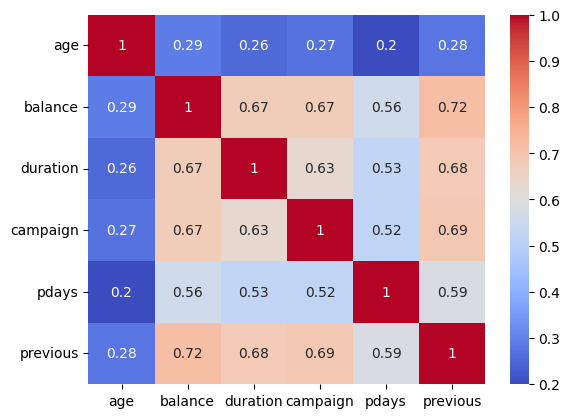

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

df_cor=df[['age','balance','duration','campaign','pdays','previous']] 
print(df_cor.corr())  # Correlation matrix
sns.heatmap(df_cor.corr(), annot=True, cmap='coolwarm')  # Heatmap visualization


**Here there is no variable which has an corelation above 0.8 hence there is no perfect multicolinearity.**

# * Feature Enginering *

In [9]:
#Standardiazation.
# since the data for each category are spread in different ranges so that the Standardization helP to prevent the overdomianance of high valued data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age','balance','duration','campaign','pdays','previous']] = scaler.fit_transform(df[['age','balance','duration','campaign','pdays','previous']])  


In [10]:
# for converting categorical variable to numerical  i am using the knn
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical columns
df['job'] = label_encoder.fit_transform(df['job'])
df['education'] = label_encoder.fit_transform(df['education'])
df['marital']=label_encoder.fit_transform(df['marital'])

In [11]:
# checking that the above converted categorical columns are converted properly.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   last contact date  39211 non-null  object 
 1   age                39211 non-null  float64
 2   job                39211 non-null  int64  
 3   marital            39211 non-null  int64  
 4   education          39211 non-null  int64  
 5   default            39211 non-null  object 
 6   balance            39211 non-null  float64
 7   housing            39211 non-null  object 
 8   loan               39211 non-null  object 
 9   contact            28875 non-null  object 
 10  duration           39211 non-null  float64
 11  campaign           39211 non-null  float64
 12  pdays              39211 non-null  float64
 13  previous           39211 non-null  float64
 14  poutcome           9760 non-null   object 
 15  target             39211 non-null  object 
dtypes: float64(6), int64(3

# missing data handling using the simple imputation 

I had done some simple imputation techniques in the begining .
but it doesn't give an suitable accuracy for the model . so finaly i had this type of dealing the missig value.

so i am adding those code as ref.

mean_imputer = SimpleImputer(strategy='mean')
df['job'] = mean_imputer.fit_transform(df[['job']]
df['education']=mean_imputer.fit_transform(df[['education']]

**Handling the missing value using the method knn**

In [12]:
# Applying the Knn imputer.
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer



imputer = KNNImputer(n_neighbors=3)

columns_to_impute = ['job', 'education']


imputed_values = imputer.fit_transform(df[columns_to_impute])

# Create a DataFrame with the imputed values
df_imputed = pd.DataFrame(imputed_values, columns=columns_to_impute)

# Combine with the original DataFrame (excluding the columns to be imputed)
df= pd.concat([df.drop(columns=columns_to_impute), df_imputed], axis=1)


In [13]:
# checking that the above code worked properly.
df.isnull().sum()

last contact date        0
age                      0
marital                  0
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
job                      0
education                0
dtype: int64

Since the contact and poutcome has  10336 and 29451 missing values , so removing the poutcome is  better than imputing . beacuse 75% of data is missing.

In [14]:
# converting the categorical variable to numerical
LE=LabelEncoder()
df['contact'] =LE.fit_transform(df['contact'])
df['target']= df['target'].replace({'yes': 1, 'no': 0})


/tmp/ipykernel_17/3109645675.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target']= df['target'].replace({'yes': 1, 'no': 0})


In [15]:
# Compute correlation of the column with the target variable
correlation_with_target = df['contact'].corr(df['target'])
print(correlation_with_target)



-0.14192485944619734


* As contact corelation with the target is  an weak negative corelation so removing the target doesnt have much problem. Hence the colum of contact and the poutcome are removed.

In [16]:

df = df.drop(['contact','poutcome'], axis=1)

# To check the above mentioned columns are removed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   last contact date  39211 non-null  object 
 1   age                39211 non-null  float64
 2   marital            39211 non-null  int64  
 3   default            39211 non-null  object 
 4   balance            39211 non-null  float64
 5   housing            39211 non-null  object 
 6   loan               39211 non-null  object 
 7   duration           39211 non-null  float64
 8   campaign           39211 non-null  float64
 9   pdays              39211 non-null  float64
 10  previous           39211 non-null  float64
 11  target             39211 non-null  int64  
 12  job                39211 non-null  float64
 13  education          39211 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 4.2+ MB


In [17]:
# To check is there any missing value present in the data frame
df.isnull().sum()

last contact date    0
age                  0
marital              0
default              0
balance              0
housing              0
loan                 0
duration             0
campaign             0
pdays                0
previous             0
target               0
job                  0
education            0
dtype: int64

**Converting categorical variable into numerical variable**

In [18]:
# deafult , housing , loan colum are converted in such a way that  yes into '1' and no into '0'

df['default']= df['default'].replace({'yes': 1, 'no': 0})
df['housing']= df['housing'].replace({'yes': 1, 'no': 0})
df['loan']= df['loan'].replace({'yes': 1, 'no': 0})

/tmp/ipykernel_17/2517072312.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['default']= df['default'].replace({'yes': 1, 'no': 0})
/tmp/ipykernel_17/2517072312.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['housing']= df['housing'].replace({'yes': 1, 'no': 0})
/tmp/ipykernel_17/2517072312.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `

**Converting the categorical variable into numerical variable for the train dataset**

In [19]:
# converting the last contact date into numerical data
df['last contact date'] = pd.to_datetime(df['last contact date'])
df['year'] = df['last contact date'].dt.year
df['month'] = df['last contact date'].dt.month
df['day'] = df['last contact date'].dt.day
df['day_of_week'] = df['last contact date'].dt.dayofweek
df = df.drop('last contact date', axis=1)

In [20]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['year', 'month', 'day', 'day_of_week']

scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])



In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          39211 non-null  float64
 1   marital      39211 non-null  int64  
 2   default      39211 non-null  int64  
 3   balance      39211 non-null  float64
 4   housing      39211 non-null  int64  
 5   loan         39211 non-null  int64  
 6   duration     39211 non-null  float64
 7   campaign     39211 non-null  float64
 8   pdays        39211 non-null  float64
 9   previous     39211 non-null  float64
 10  target       39211 non-null  int64  
 11  job          39211 non-null  float64
 12  education    39211 non-null  float64
 13  year         39211 non-null  float64
 14  month        39211 non-null  float64
 15  day          39211 non-null  float64
 16  day_of_week  39211 non-null  float64
dtypes: float64(12), int64(5)
memory usage: 5.1 MB


In [22]:
y=df['target']
x=df.drop(['target'],axis=1)


In [23]:
x_train=x
y_train=y

In [24]:
df.shape

(39211, 17)

#  For the test data set 

In [25]:
# read the dataframe into df_t

df_t=pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

In [26]:
df_t.shape

(10000, 15)

In [27]:
# To get the datatype of each coloum, total number of data , coloum names and number of coloums used in data
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  10000 non-null  object
 1   age                10000 non-null  int64 
 2   job                9941 non-null   object
 3   marital            10000 non-null  object
 4   education          9610 non-null   object
 5   default            10000 non-null  object
 6   balance            10000 non-null  int64 
 7   housing            10000 non-null  object
 8   loan               10000 non-null  object
 9   contact            7316 non-null   object
 10  duration           10000 non-null  int64 
 11  campaign           10000 non-null  int64 
 12  pdays              10000 non-null  int64 
 13  previous           10000 non-null  int64 
 14  poutcome           2492 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


# feature enginering

In [28]:
#Standardiazation.
# since the data for each category are spread in different ranges so that the Standardization helP to prevent the overdomianance of high valued data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_t[['age','balance','duration','campaign','pdays','previous']] = scaler.fit_transform(df_t[['age','balance','duration','campaign','pdays','previous']])  


In [29]:
# for converting categorical variable to numerical 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical columns
df_t['job'] = label_encoder.fit_transform(df_t['job'])
df_t['education'] = label_encoder.fit_transform(df_t['education'])
df_t['marital']=label_encoder.fit_transform(df_t['marital'])

**inorder to fill the missing value using the knn**

In [30]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer



imputer = KNNImputer(n_neighbors=3)

columns_to_impute = ['job', 'education']


imputed_values = imputer.fit_transform(df_t[columns_to_impute])

# Create a DataFrame with the imputed values
df_t_imputed = pd.DataFrame(imputed_values, columns=columns_to_impute)

# Combine with the original DataFrame (excluding the columns to be imputed)
df_t = pd.concat([df_t.drop(columns=columns_to_impute), df_t_imputed], axis=1)


In [31]:
# Remove the coloum poutcome and contact as it is removed from the train data set
df_t=df_t.drop(['contact','poutcome'],axis=1)

In [32]:
# checking for the missing value present
df_t.isna().sum()

last contact date    0
age                  0
marital              0
default              0
balance              0
housing              0
loan                 0
duration             0
campaign             0
pdays                0
previous             0
job                  0
education            0
dtype: int64

In [33]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   last contact date  10000 non-null  object 
 1   age                10000 non-null  float64
 2   marital            10000 non-null  int64  
 3   default            10000 non-null  object 
 4   balance            10000 non-null  float64
 5   housing            10000 non-null  object 
 6   loan               10000 non-null  object 
 7   duration           10000 non-null  float64
 8   campaign           10000 non-null  float64
 9   pdays              10000 non-null  float64
 10  previous           10000 non-null  float64
 11  job                10000 non-null  float64
 12  education          10000 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1015.8+ KB


In [34]:
# converting the categorical variable into numerical variable

df_t['default'] = df['default'].replace({'yes': 1, 'no': 0})
df_t['housing'] = df['housing'].replace({'yes': 1, 'no': 0})
df_t['loan'] = df['loan'].replace({'yes': 1, 'no': 0})

In [35]:
# Check that all categorical variable are converted into numerical variable.

df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   last contact date  10000 non-null  object 
 1   age                10000 non-null  float64
 2   marital            10000 non-null  int64  
 3   default            10000 non-null  int64  
 4   balance            10000 non-null  float64
 5   housing            10000 non-null  int64  
 6   loan               10000 non-null  int64  
 7   duration           10000 non-null  float64
 8   campaign           10000 non-null  float64
 9   pdays              10000 non-null  float64
 10  previous           10000 non-null  float64
 11  job                10000 non-null  float64
 12  education          10000 non-null  float64
dtypes: float64(8), int64(4), object(1)
memory usage: 1015.8+ KB


In [36]:
# converting the last contact date into numerical
df_t['last contact date'] = pd.to_datetime(df_t['last contact date'],errors='coerce')


df_t['year'] = df_t['last contact date'].dt.year
df_t['month'] = df_t['last contact date'].dt.month
df_t['day'] = df_t['last contact date'].dt.day
df_t['day_of_week'] = df_t['last contact date'].dt.dayofweek


df_t = df_t.drop('last contact date', axis=1)


In [37]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['year', 'month', 'day', 'day_of_week']

scaler = MinMaxScaler()

df_t[columns_to_normalize] = scaler.fit_transform(df_t[columns_to_normalize])



In [38]:
# check that missing data present.
df_t.isna().sum()

age            0
marital        0
default        0
balance        0
housing        0
loan           0
duration       0
campaign       0
pdays          0
previous       0
job            0
education      0
year           0
month          0
day            0
day_of_week    0
dtype: int64

In [39]:
# Renaming the df_t as x_test.
x_test=df_t


 Cross checking that, is there any mismatch in terms or arrangement of coloumns , datatypes, etc

In [40]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          10000 non-null  float64
 1   marital      10000 non-null  int64  
 2   default      10000 non-null  int64  
 3   balance      10000 non-null  float64
 4   housing      10000 non-null  int64  
 5   loan         10000 non-null  int64  
 6   duration     10000 non-null  float64
 7   campaign     10000 non-null  float64
 8   pdays        10000 non-null  float64
 9   previous     10000 non-null  float64
 10  job          10000 non-null  float64
 11  education    10000 non-null  float64
 12  year         10000 non-null  float64
 13  month        10000 non-null  float64
 14  day          10000 non-null  float64
 15  day_of_week  10000 non-null  float64
dtypes: float64(12), int64(4)
memory usage: 1.2 MB


In [41]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          39211 non-null  float64
 1   marital      39211 non-null  int64  
 2   default      39211 non-null  int64  
 3   balance      39211 non-null  float64
 4   housing      39211 non-null  int64  
 5   loan         39211 non-null  int64  
 6   duration     39211 non-null  float64
 7   campaign     39211 non-null  float64
 8   pdays        39211 non-null  float64
 9   previous     39211 non-null  float64
 10  job          39211 non-null  float64
 11  education    39211 non-null  float64
 12  year         39211 non-null  float64
 13  month        39211 non-null  float64
 14  day          39211 non-null  float64
 15  day_of_week  39211 non-null  float64
dtypes: float64(12), int64(4)
memory usage: 4.8 MB


In [42]:
# Check if columns are identical in both dataframes
if list(x_train.columns) == list(x_test.columns):
    print("X_train and X_test have the same columns.")
else:
    print("X_train and X_test do NOT have the same columns.")


X_train and X_test have the same columns.


In [43]:
print(x_train.shape,x_test.shape)

(39211, 16) (10000, 16)


# Model training

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
# train and validation split help to check the model performance

from sklearn.model_selection import train_test_split


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)




# logistic reg

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', solver='lbfgs')
model.fit(x_train, y_train)


LogisticRegression()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_pred_log= model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

Confusion Matrix:
[[6491  154]
 [1032  166]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6645
           1       0.52      0.14      0.22      1198

    accuracy                           0.85      7843
   macro avg       0.69      0.56      0.57      7843
weighted avg       0.81      0.85      0.81      7843



# Random forest learning

In [48]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(
                                    n_estimators=400,
                                    min_samples_split=2,
                                    min_samples_leaf=2,
                                    max_features='sqrt',
                                    max_depth=None,
                                    bootstrap=True,
                                    class_weight='balanced', 
                                    random_state=42
                                )
rf_model.fit(X_train,y_train)



RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       n_estimators=400, random_state=42)

In [49]:
y_pred_rf= rf_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix:
[[6082  563]
 [ 517  681]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6645
           1       0.55      0.57      0.56      1198

    accuracy                           0.86      7843
   macro avg       0.73      0.74      0.74      7843
weighted avg       0.86      0.86      0.86      7843



# bagging

In [50]:
# bagging


from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    max_samples=0.8,
    max_features=0.7,
    oob_score=True,
    random_state=42
)
bagging_clf.fit(x_train, y_train)



/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  max_features=0.7, max_samples=0.8, n_estimators=50,
                  oob_score=True, random_state=42)

In [51]:
y_pred_bag= bagging_clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bag))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bag))

Confusion Matrix:
[[6434  211]
 [ 989  209]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      6645
           1       0.50      0.17      0.26      1198

    accuracy                           0.85      7843
   macro avg       0.68      0.57      0.59      7843
weighted avg       0.81      0.85      0.81      7843



# boosting


In [52]:
#boosting 
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators=700,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=4,  
    random_state=42,
)
xgb_clf.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [53]:
y_pred_boo= xgb_clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_boo))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_boo))

Confusion Matrix:
[[5838  807]
 [ 286  912]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      6645
           1       0.53      0.76      0.63      1198

    accuracy                           0.86      7843
   macro avg       0.74      0.82      0.77      7843
weighted avg       0.89      0.86      0.87      7843



# predicting

**logistic classifier**

In [54]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          10000 non-null  float64
 1   marital      10000 non-null  int64  
 2   default      10000 non-null  int64  
 3   balance      10000 non-null  float64
 4   housing      10000 non-null  int64  
 5   loan         10000 non-null  int64  
 6   duration     10000 non-null  float64
 7   campaign     10000 non-null  float64
 8   pdays        10000 non-null  float64
 9   previous     10000 non-null  float64
 10  job          10000 non-null  float64
 11  education    10000 non-null  float64
 12  year         10000 non-null  float64
 13  month        10000 non-null  float64
 14  day          10000 non-null  float64
 15  day_of_week  10000 non-null  float64
dtypes: float64(12), int64(4)
memory usage: 1.2 MB


In [55]:
y_pred_logistic_reg_t=model.predict(x_test)

**random forest**

In [56]:
y_pred_random_forest_t=rf_model.predict(x_test)


# bagging

In [57]:
#bagging_preds = bagging_clf.predict(X_test)

# boosting

In [58]:
y_pred_boosting_pred=xgb_clf.predict(x_test)

In [59]:
predictions = pd.DataFrame({
    'id': df_t.index, 
    'target':np.where(y_pred_random_forest_t == 1, 'yes', 'no')
                            })


#predictions.to_csv('submission.csv', index=False)
# 0.64794

In [60]:
predictions = pd.DataFrame({
    'id': df_t.index, 
    'target':np.where(y_pred_logistic_reg_t == 1, 'yes', 'no')
                            })


#predictions.to_csv('submission.csv', index=False)


In [61]:
predictions_boosting = pd.DataFrame({
    'id': df_t.index, 
    'target':np.where(y_pred_boosting_pred == 1, 'yes', 'no')
                            })
predictions_boosting.to_csv('submission.csv', index=False)